In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [73]:
data = pd.read_csv('DS_DATESET.csv')

In [74]:
data.head()

,First Name,Last Name,City,State,Zip Code,DOB [DD/MM/YYYY],Age,Gender,Email Address,Contact Number,Emergency Contact Number,College name,University Name,Degree,Major/Area of Study,Course Type,Which-year are you studying in?,CGPA/ percentage,Expected Graduation-year,Areas of interest,Current Employment Status,Have you worked core Java,Programming Language Known other than Java (one major),Have you worked on MySQL or Oracle database,Have you studied OOP Concepts,Certifications/Achievement/ Research papers,Rate your written communication skills [1-10],Rate your verbal communication skills [1-10],Link to updated Resume (Google/ One Drive link preferred),link to Linkedin profile,How Did You Hear About This Internship?,Label
0,Barron,Harnes,Kolhapur,Maharashtra,416004,24/09/2000,19,Male,bharnes0@harvard.edu,6345186600,7828240738,DY Patil College of Engineering And Technology,Shivaji University,B.Tech,Electrical Engineering,Full-time,Second-year,7.26,2022,Artificial Intelligence,Student,Yes,HTML/CSS,Yes,No,NaN,6,10,NaN,NaN,Twitter,ineligible
1,Velma,Allone,Pune,Maharashtra,411011,23/10/1997,22,Female,vallone1@i2i.jp,2808753102,2891397791,Vishwakarma Institute of Information Technology,Savitribai Phule Pune University,B.Tech,Electronics and Telecommunication,Full-time,Fourth-year,8.73,2020,Cloud Computing,Student,Yes,PHP,No,Yes,NaN,10,7,NaN,NaN,Ex/Current Employee,eligible
2,Thibaut,Scotland,Mumbai,Maharashtra,400059,6/2/1996,24,Male,tscotland2@opensource.org,2945231918,9388905869,Vidyalankar Institute of Technology,Mumbai University,B.E.,Electrical Engineering,Full-time,Fourth-year,8.61,2020,IoT,Student,Yes,C,No,No,NaN,8,6,NaN,NaN,Twitter,ineligible
3,Retha,Proud,Solapur,Maharashtra,413224,26/12/1999,20,Female,rproud3@flavors.me,7507196200,8037797161,Brahmdevdada Mane Institute of Technology,Punyashlok Ahilyadevi Holkar Solapur University,B.Tech,Computer Engineering,Full-time,Second-year,7.96,2022,Digital Marketing,Student,No,PHP,No,Yes,NaN,9,6,NaN,NaN,Twitter,ineligible
4,Del,Pearse,Sangli,Maharashtra,416436,21/09/1996,23,Female,dpearse4@sakura.ne.jp,6643884281,1328949359,Rajarambapu Institute of Technology,Shivaji University,B.Tech,Electrical Engineering,Full-time,First-year,7.07,2023,Cloud Computing,Student,No,Python,No,Yes,NaN,8,6,NaN,NaN,Facebook,ineligible


In [75]:
data.shape

(10000, 32)

In [76]:
data.columns

Index(['First Name', 'Last Name', 'City', 'State', 'Zip Code',
       'DOB [DD/MM/YYYY]', 'Age', 'Gender', 'Email Address', 'Contact Number',
       'Emergency Contact Number', 'College name', 'University Name', 'Degree',
       'Major/Area of Study', 'Course Type', 'Which-year are you studying in?',
       'CGPA/ percentage', 'Expected Graduation-year', 'Areas of interest',
       'Current Employment Status', 'Have you worked core Java',
       'Programming Language Known other than Java (one major)',
       'Have you worked on MySQL or Oracle database',
       'Have you studied OOP Concepts',
       'Certifications/Achievement/ Research papers',
       'Rate your written communication skills [1-10]',
       'Rate your verbal communication skills [1-10]',
       'Link to updated Resume (Google/ One Drive link preferred)',
       'link to Linkedin profile', 'How Did You Hear About This Internship?',
       'Label'],
      dtype='object')

In [77]:
drop_cols = ['First Name', 'Last Name','State', 'Zip Code',
       'DOB [DD/MM/YYYY]', 'Age', 'Gender', 'Email Address', 'Contact Number',
       'Emergency Contact Number','University Name', 'Degree', 'Course Type', 'Expected Graduation-year', 'Current Employment Status', 'Have you worked core Java','Current Employment Status', 'Have you worked core Java','Have you worked on MySQL or Oracle database',
       'Have you studied OOP Concepts']

In [78]:
data.drop(['First Name', 'Last Name','State', 'Zip Code',
       'DOB [DD/MM/YYYY]', 'Age', 'Gender', 'Email Address', 'Contact Number',
       'Emergency Contact Number','University Name', 'Degree', 'Course Type', 'Expected Graduation-year', 'Current Employment Status', 'Have you worked core Java','Current Employment Status', 'Have you worked core Java'],axis = 1, inplace = True)

In [79]:
data.drop(['Have you worked on MySQL or Oracle database',
       'Have you studied OOP Concepts'], axis=1, inplace=True)

In [80]:
data.columns

Index(['City', 'College name', 'Major/Area of Study',
       'Which-year are you studying in?', 'CGPA/ percentage',
       'Areas of interest',
       'Programming Language Known other than Java (one major)',
       'Certifications/Achievement/ Research papers',
       'Rate your written communication skills [1-10]',
       'Rate your verbal communication skills [1-10]',
       'Link to updated Resume (Google/ One Drive link preferred)',
       'link to Linkedin profile', 'How Did You Hear About This Internship?',
       'Label'],
      dtype='object')

In [81]:
data.isnull().sum()

City                                                             0
College name                                                     0
Major/Area of Study                                              0
Which-year are you studying in?                                  0
CGPA/ percentage                                                 0
Areas of interest                                                0
Programming Language Known other than Java (one major)           0
Certifications/Achievement/ Research papers                  10000
Rate your written communication skills [1-10]                    0
Rate your verbal communication skills [1-10]                     0
Link to updated Resume (Google/ One Drive link preferred)    10000
link to Linkedin profile                                     10000
How Did You Hear About This Internship?                          0
Label                                                            0
dtype: int64

In [82]:
data.drop(['Certifications/Achievement/ Research papers', 'Link to updated Resume (Google/ One Drive link preferred)',
       'link to Linkedin profile'], axis = 1, inplace = True)

In [83]:
data.isnull().sum()

City                                                      0
College name                                              0
Major/Area of Study                                       0
Which-year are you studying in?                           0
CGPA/ percentage                                          0
Areas of interest                                         0
Programming Language Known other than Java (one major)    0
Rate your written communication skills [1-10]             0
Rate your verbal communication skills [1-10]              0
How Did You Hear About This Internship?                   0
Label                                                     0
dtype: int64

In [84]:
data['Areas of interest'].value_counts()

DevOps                      674
Machine Learning            671
Python                      652
Cyber Security              638
Web Development             637
QMS/Testing                 633
Mobility                    631
IoT                         630
Artificial Intelligence     627
Digital Marketing           624
Blockchain                  623
Big Data                    612
Data Science                601
Information Security        598
RPA                         589
Cloud Computing             560
Name: Areas of interest, dtype: int64

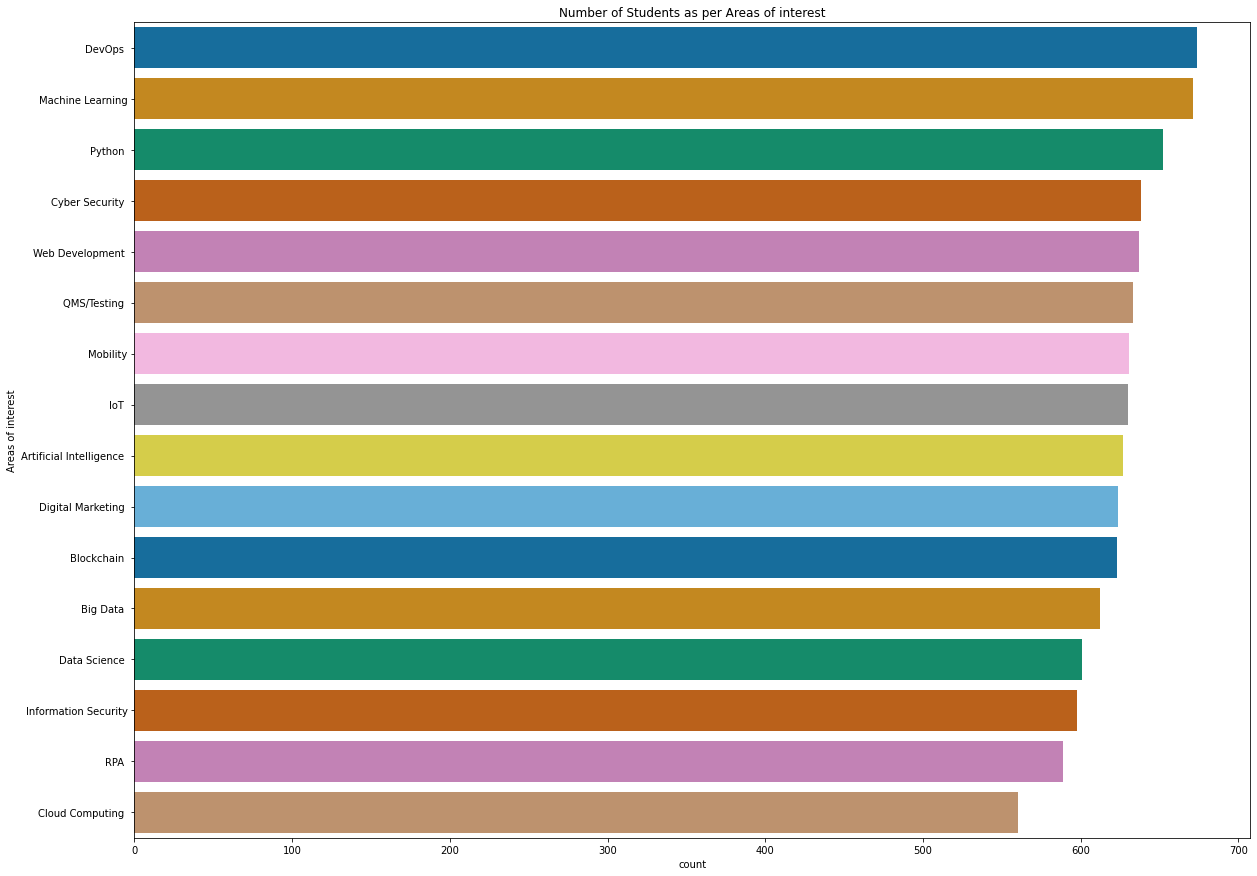

In [85]:
plt.figure(figsize=(20,15))
ax=sns.countplot(y = data['Areas of interest'], order = data['Areas of interest'].value_counts().index, palette='colorblind')
ax.set_title("Number of Students as per Areas of interest")
plt.show()

In [86]:
data.rename(columns = {'Areas of interest':'Areas_of_interest', 'Programming Language Known other than Java (one major)':'python_or_any_other'
                              }, inplace = True) 

In [87]:
data.columns

Index(['City', 'College name', 'Major/Area of Study',
       'Which-year are you studying in?', 'CGPA/ percentage',
       'Areas_of_interest', 'python_or_any_other',
       'Rate your written communication skills [1-10]',
       'Rate your verbal communication skills [1-10]',
       'How Did You Hear About This Internship?', 'Label'],
      dtype='object')

In [88]:
total_data_science_students = np.count_nonzero(np.where(data['Areas_of_interest'] == 'Data Science '))
total_data_science_students

601

In [89]:
data_science_with_python = np.count_nonzero(np.where((data['Areas_of_interest'] == 'Data Science ') & (data['python_or_any_other'] == 'Python')))


In [90]:
data_science_without_python = total_data_science_students - data_science_with_python
data_science_without_python

535

In [91]:
labels=['DS with python','DS without python']
explode=[0,0.1]
data_of_ds_students= [data_science_with_python,data_science_without_python]
def absolute_value(val):
    a  = np.round(val/100.*sum(data_of_ds_students), 0)
    return a

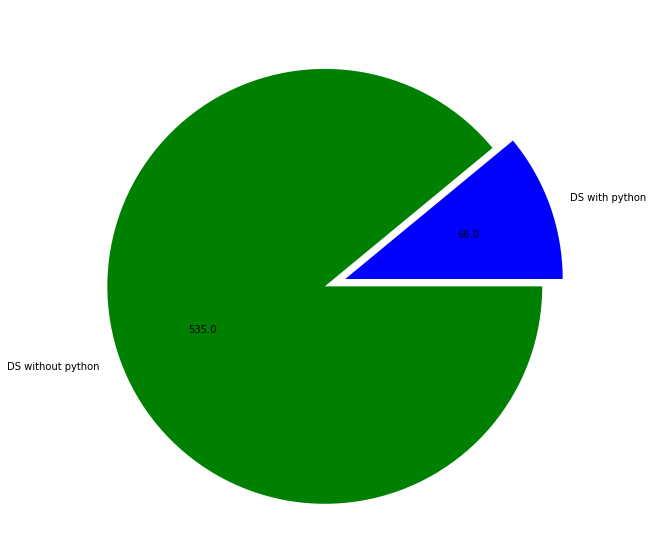

In [92]:
plt.figure(figsize=(15,10))
plt.pie(data_of_ds_students,labels=labels,autopct=absolute_value,colors=['blue','green'],explode=explode)
plt.show()

In [93]:
data['How Did You Hear About This Internship?'].value_counts()

Intern                 1173
Newspaper              1162
Twitter                1160
Blog post              1116
LinkedIn               1112
Friend                 1109
Facebook               1084
Other                  1077
Ex/Current Employee    1007
Name: How Did You Hear About This Internship?, dtype: int64

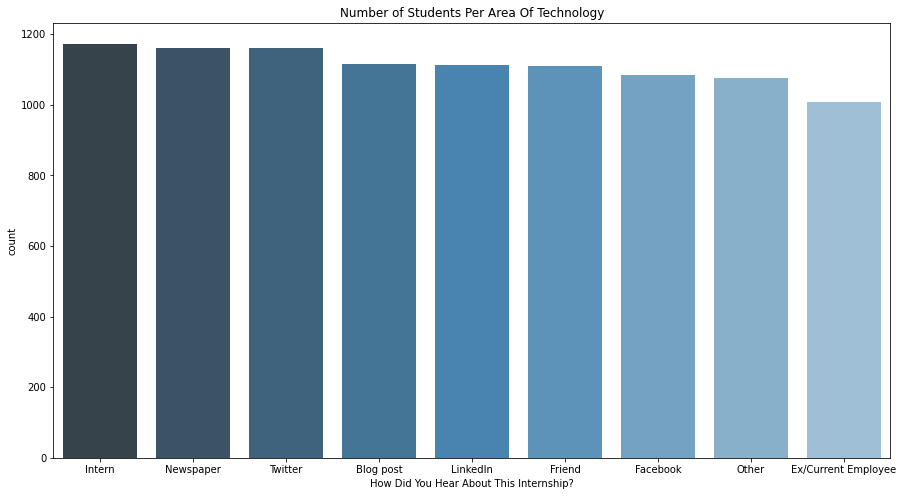

In [94]:
plt.figure(figsize=(15,8))
ax=sns.countplot(data['How Did You Hear About This Internship?'], order = data['How Did You Hear About This Internship?'].value_counts().index, palette='Blues_d')
ax.set_title("Number of Students Per Area Of Technology")
plt.show()

In [95]:
data['Which-year are you studying in?'].value_counts()

Second-year    2550
First-year     2510
Fourth-year    2477
Third-year     2463
Name: Which-year are you studying in?, dtype: int64

In [96]:
total_fourth_year_students = np.count_nonzero(np.where(data['Which-year are you studying in?'] == 'Fourth-year'))
total_fourth_year_students

2477

In [97]:
FY_greater_than_8_CGPA = np.count_nonzero(np.where((data['Which-year are you studying in?'] == 'Fourth-year') & (data['CGPA/ percentage'] > 8.0)))
FY_greater_than_8_CGPA

1697

In [98]:
FY_equal_or_less_than_8_CGPA = total_fourth_year_students - FY_greater_than_8_CGPA
FY_equal_or_less_than_8_CGPA

780

In [99]:
x=['FY_greater_than_8_CGPA','FY_equal_or_less_than_8_CGPA']
y=[FY_greater_than_8_CGPA,FY_equal_or_less_than_8_CGPA]

Text(0, 0.5, 'Number of students')

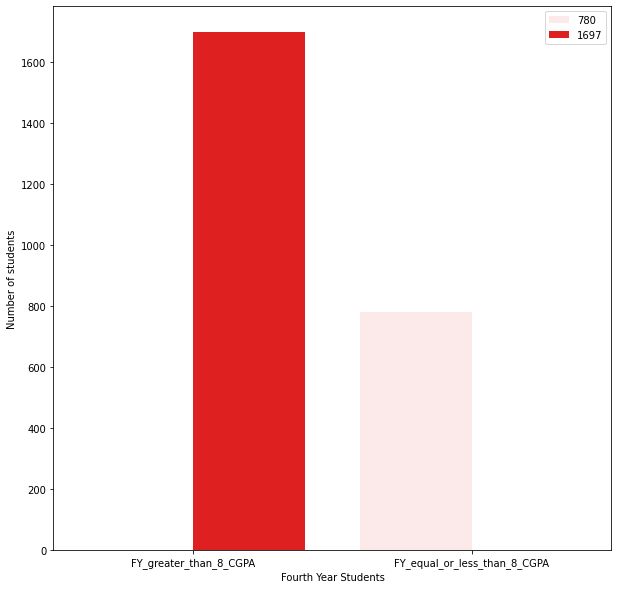

In [100]:
plt.figure(figsize=(10,10))
ax=sns.barplot(x=x,y=y,hue=y,color='red')
ax.set_xlabel('Fourth Year Students')
ax.set_ylabel('Number of students')


In [101]:
total_digital_marketing_students = np.count_nonzero(np.where(data['Areas_of_interest'] == 'Digital Marketing '))
total_digital_marketing_students

624

In [102]:
DM_greater_than_8 = np.count_nonzero(np.where((data['Which-year are you studying in?'] == 'Fourth-year') & (data['Rate your written communication skills [1-10]'] > 8.0) & (data['Rate your verbal communication skills [1-10]'] > 8.0)))
DM_greater_than_8

376

In [103]:
DM_equal_or_less_than_8 = total_digital_marketing_students - DM_greater_than_8
DM_equal_or_less_than_8

248

In [104]:
x=['DM_greater_than_8','DM_equal_or_less_than_8']
y=[DM_greater_than_8,DM_equal_or_less_than_8]

Text(0, 0.5, 'Number of students')

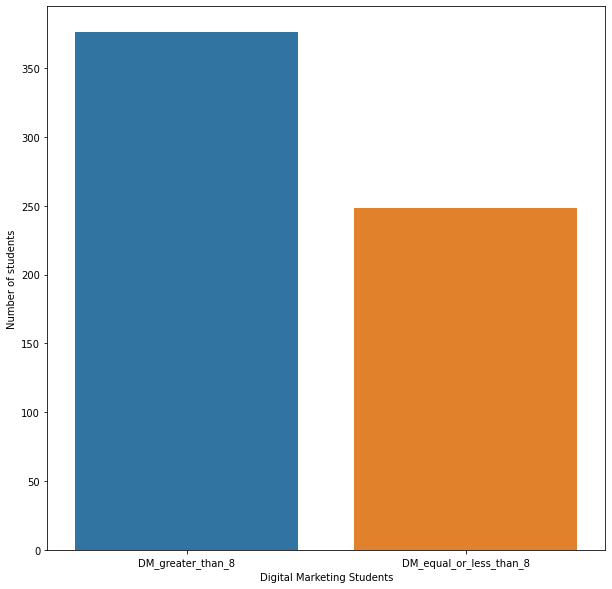

In [105]:
plt.figure(figsize=(10,10))
ax = sns.barplot(x=x,y=y,data=data)
ax.set_xlabel('Digital Marketing Students')
ax.set_ylabel('Number of students')


   Which-year are you studying in?                Major/Area of Study  City
0                       First-year               Computer Engineering  1470
1                       First-year             Electrical Engineering   490
2                       First-year  Electronics and Telecommunication   550
3                      Fourth-year               Computer Engineering  1516
4                      Fourth-year             Electrical Engineering   464
5                      Fourth-year  Electronics and Telecommunication   497
6                      Second-year               Computer Engineering  1536
7                      Second-year             Electrical Engineering   518
8                      Second-year  Electronics and Telecommunication   496
9                       Third-year               Computer Engineering  1449
10                      Third-year             Electrical Engineering   561
11                      Third-year  Electronics and Telecommunication   453


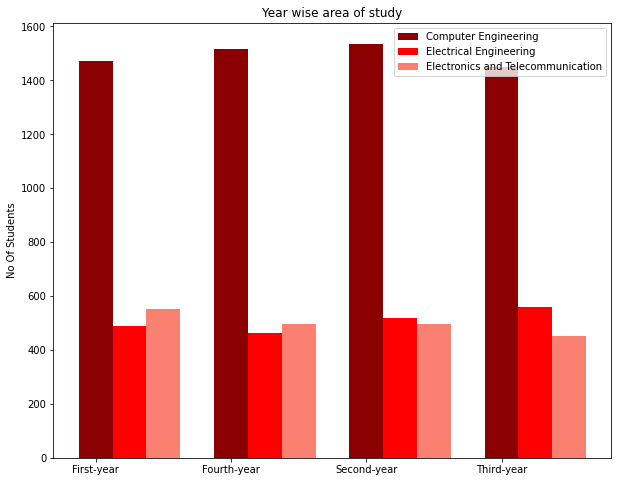

In [106]:
ya = data[["Which-year are you studying in?","Major/Area of Study","City"]].copy()
ya = ya.groupby(["Which-year are you studying in?","Major/Area of Study"],as_index=False)['City'].count()
print(ya)

y1 = ya[ya["Major/Area of Study"] == "Computer Engineering" ]["City"]
y2 = ya[ya["Major/Area of Study"] == "Electrical Engineering" ]["City"]
y3 = ya[ya["Major/Area of Study"] == "Electronics and Telecommunication" ]["City"]
labels = ya["Which-year are you studying in?"].unique()
x = np.arange(len(labels))
width = 0.25 
plt.rcParams["figure.figsize"]= 10,8

fig, ax = plt.subplots()
rects1 = ax.bar(x + 0.0 , y1, width, label='Computer Engineering',color='darkred')
rects2 = ax.bar(x + 0.25 , y2, width, label='Electrical Engineering',color='red')
rects3 = ax.bar(x + 0.5 , y3, width, label='Electronics and Telecommunication',color='salmon')
ax.set_ylabel('No Of Students')
ax.set_title('Year wise area of study')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(loc='upper right')

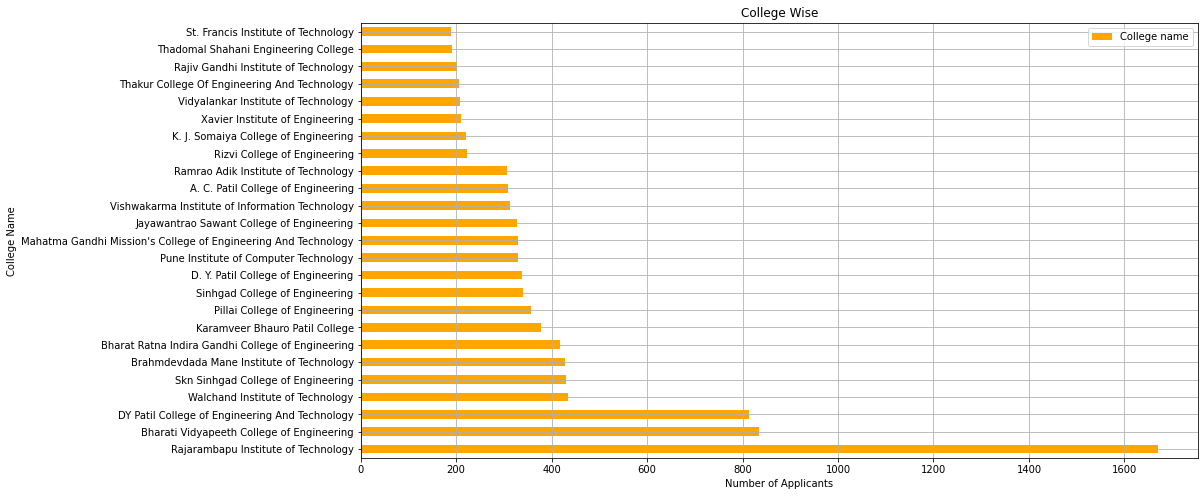

In [107]:
cllgplot=data['College name'].value_counts().to_frame()
cllgplot.plot(kind='barh', figsize=(15, 8),color="orange")
plt.ylabel("College Name")
plt.xlabel('Number of Applicants')
plt.title('College Wise')
plt.grid(True)
plt.show()

In [108]:
data["Label"] = data["Label"].replace({'eligible':1,'ineligible':0})
data.head()

,City,College name,Major/Area of Study,Which-year are you studying in?,CGPA/ percentage,Areas_of_interest,python_or_any_other,Rate your written communication skills [1-10],Rate your verbal communication skills [1-10],How Did You Hear About This Internship?,Label
0,Kolhapur,DY Patil College of Engineering And Technology,Electrical Engineering,Second-year,7.26,Artificial Intelligence,HTML/CSS,6,10,Twitter,0
1,Pune,Vishwakarma Institute of Information Technology,Electronics and Telecommunication,Fourth-year,8.73,Cloud Computing,PHP,10,7,Ex/Current Employee,1
2,Mumbai,Vidyalankar Institute of Technology,Electrical Engineering,Fourth-year,8.61,IoT,C,8,6,Twitter,0
3,Solapur,Brahmdevdada Mane Institute of Technology,Computer Engineering,Second-year,7.96,Digital Marketing,PHP,9,6,Twitter,0
4,Sangli,Rajarambapu Institute of Technology,Electrical Engineering,First-year,7.07,Cloud Computing,Python,8,6,Facebook,0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Unrecognized location 'centre left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  if __name__ == '__main__':


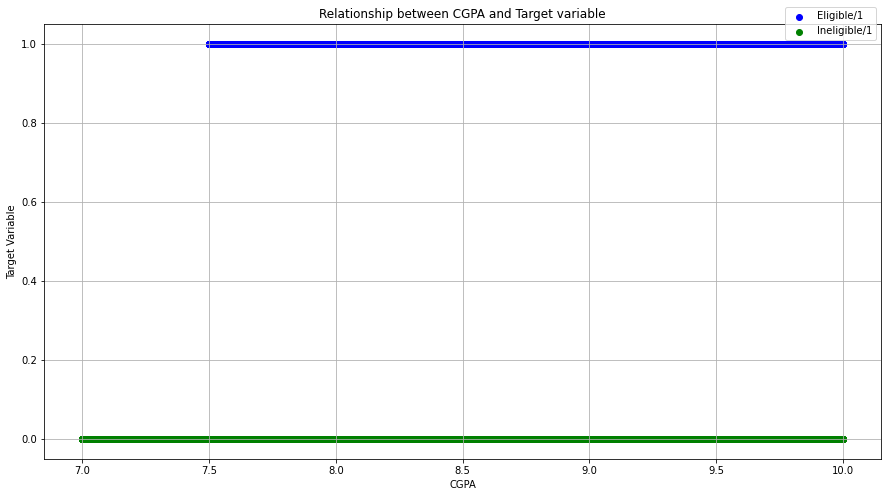

In [109]:
eligible = data[data['Label']==1]
ineligible = data[data['Label']==0]
fig,ax = plt.subplots()
ax.scatter(eligible['CGPA/ percentage'], eligible['Label'], color='blue', label='Eligible/1')
ax.scatter(ineligible['CGPA/ percentage'], ineligible['Label'], color='green', label='Ineligible/1')
ax.set_xlabel('CGPA')
ax.set_ylabel('Target Variable')
ax.set_title('Relationship between CGPA and Target variable')
ax.legend(loc='centre left', bbox_to_anchor=(1, 1.05))
plt.gcf().set_size_inches(15, 8)
plt.grid(True)
plt.show()

<Figure size 576x360 with 0 Axes>

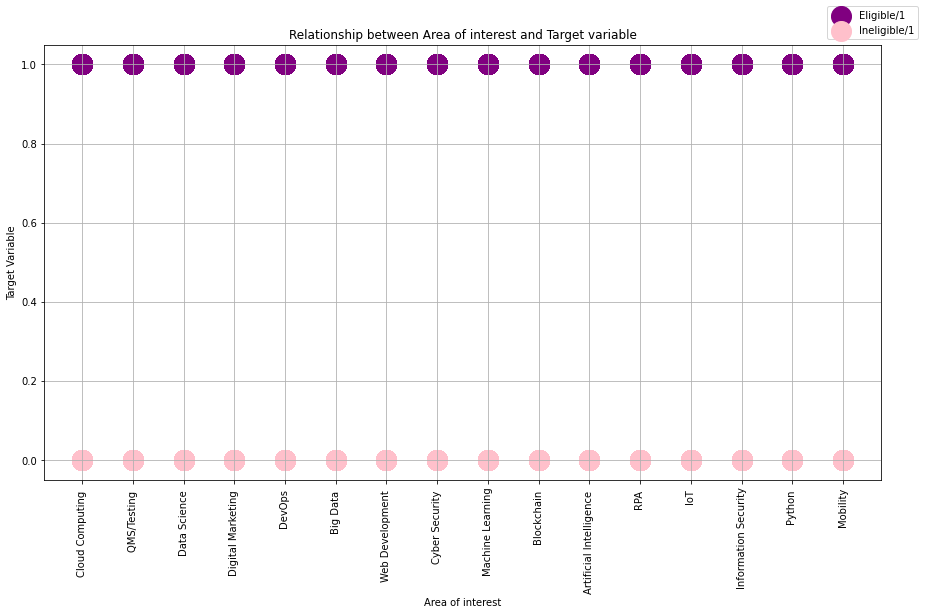

In [110]:
eligible = data[data['Label']==1]
ineligible = data[data['Label']==0]
plt.figure(figsize=(8,5))
fig,ax = plt.subplots()
ax.scatter(eligible['Areas_of_interest'], eligible['Label'], color='purple', s=400, label='Eligible/1')
ax.scatter(ineligible['Areas_of_interest'], ineligible['Label'], color='pink', s=400, label='Ineligible/1')
ax.set_xlabel('Area of interest')
ax.set_ylabel('Target Variable')
ax.set_title('Relationship between Area of interest and Target variable')
ax.legend(loc='right', bbox_to_anchor=(1.05, 1.05))
plt.gcf().set_size_inches(15, 8)
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

In [111]:
df = data[['Which-year are you studying in?','Major/Area of Study','Label']].copy()
df['Total_count'] = 1
df = df.groupby(['Which-year are you studying in?','Major/Area of Study','Label'],as_index=False).count()
df

,Which-year are you studying in?,Major/Area of Study,Label,Total_count
0,First-year,Computer Engineering,0,1470
1,First-year,Electrical Engineering,0,490
2,First-year,Electronics and Telecommunication,0,550
3,Fourth-year,Computer Engineering,0,701
4,Fourth-year,Computer Engineering,1,815
5,Fourth-year,Electrical Engineering,0,205
6,Fourth-year,Electrical Engineering,1,259
7,Fourth-year,Electronics and Telecommunication,0,222
8,Fourth-year,Electronics and Telecommunication,1,275
9,Second-year,Computer Engineering,0,718


In [112]:
ym = data[["City","Major/Area of Study","Which-year are you studying in?","Label"]]
ym = ym.groupby(["Which-year are you studying in?","Major/Area of Study","Label"],as_index=False).count()
ym

,Which-year are you studying in?,Major/Area of Study,Label,City
0,First-year,Computer Engineering,0,1470
1,First-year,Electrical Engineering,0,490
2,First-year,Electronics and Telecommunication,0,550
3,Fourth-year,Computer Engineering,0,701
4,Fourth-year,Computer Engineering,1,815
5,Fourth-year,Electrical Engineering,0,205
6,Fourth-year,Electrical Engineering,1,259
7,Fourth-year,Electronics and Telecommunication,0,222
8,Fourth-year,Electronics and Telecommunication,1,275
9,Second-year,Computer Engineering,0,718


  Which-year are you studying in?  ... City
3                     Fourth-year  ...  701
4                     Fourth-year  ...  815
5                     Fourth-year  ...  205
6                     Fourth-year  ...  259
7                     Fourth-year  ...  222
8                     Fourth-year  ...  275

[6 rows x 4 columns]


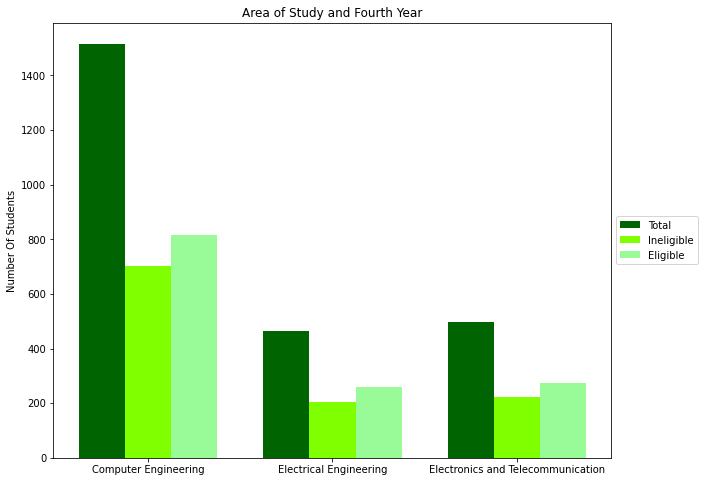

In [113]:
fig, ax = plt.subplots()
Fourth = ym[ym["Which-year are you studying in?"] == 'Fourth-year']
print(Fourth)

total_comp = Fourth[Fourth["Major/Area of Study"]=="Computer Engineering"]["City"].sum()
total_elec = Fourth[Fourth["Major/Area of Study"]=="Electrical Engineering"]["City"].sum()
total_extc = Fourth[Fourth["Major/Area of Study"]=="Electronics and Telecommunication"]["City"].sum()

y1 = Fourth[Fourth["Label"] == 0]["City"]
y2 = Fourth[Fourth["Label"] == 1]["City"]
y3 = [total_comp,total_elec,total_extc]
labels=Fourth["Major/Area of Study"].unique()
x = np.arange(len(labels))
width = 0.25

s3 = ax.bar(x , y3, width, label='Total',align='center',color='darkgreen')
s1 = ax.bar(x + 0.25 , y1, width, label='Ineligible',align='center',color='chartreuse')
s2 = ax.bar(x + 0.5, y2, width, label='Eligible',align='center',color='palegreen')

ax.set_ylabel('Number Of Students')
ax.set_title('Area of Study and Fourth Year')
ax.set_xticks(x+0.25)
ax.set_xticklabels(labels)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

   Which-year are you studying in?  ... City
15                      Third-year  ...  648
16                      Third-year  ...  801
17                      Third-year  ...  259
18                      Third-year  ...  302
19                      Third-year  ...  207
20                      Third-year  ...  246

[6 rows x 4 columns]


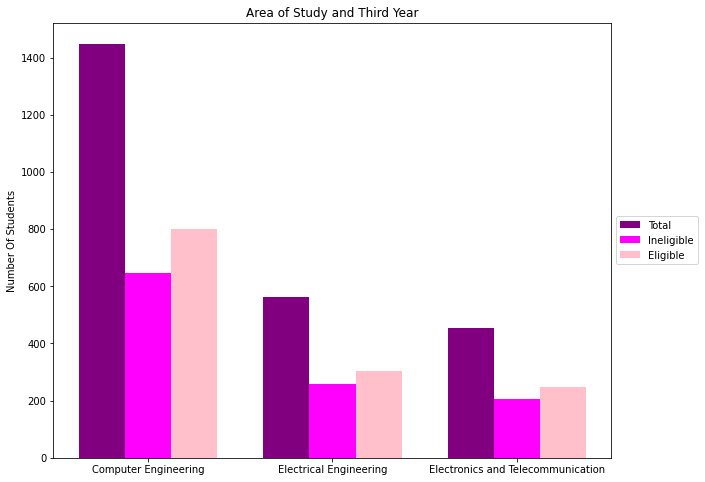

In [114]:
fig, ax = plt.subplots()
Fourth = ym[ym["Which-year are you studying in?"] == 'Third-year']
print(Fourth)

total_comp = Fourth[Fourth["Major/Area of Study"]=="Computer Engineering"]["City"].sum()
total_elec = Fourth[Fourth["Major/Area of Study"]=="Electrical Engineering"]["City"].sum()
total_extc = Fourth[Fourth["Major/Area of Study"]=="Electronics and Telecommunication"]["City"].sum()

y1 = Fourth[Fourth["Label"] == 0]["City"]
y2 = Fourth[Fourth["Label"] == 1]["City"]
y3 = [total_comp,total_elec,total_extc]
labels=Fourth["Major/Area of Study"].unique()
x = np.arange(len(labels))
width = 0.25

s3 = ax.bar(x , y3, width, label='Total',align='center',color='purple')
s1 = ax.bar(x + 0.25 , y1, width, label='Ineligible',align='center',color='magenta')
s2 = ax.bar(x + 0.5, y2, width, label='Eligible',align='center',color='pink')

ax.set_ylabel('Number Of Students')
ax.set_title('Area of Study and Third Year')
ax.set_xticks(x+0.25)
ax.set_xticklabels(labels)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

   Which-year are you studying in?  ... City
9                      Second-year  ...  718
10                     Second-year  ...  818
11                     Second-year  ...  244
12                     Second-year  ...  274
13                     Second-year  ...  223
14                     Second-year  ...  273

[6 rows x 4 columns]


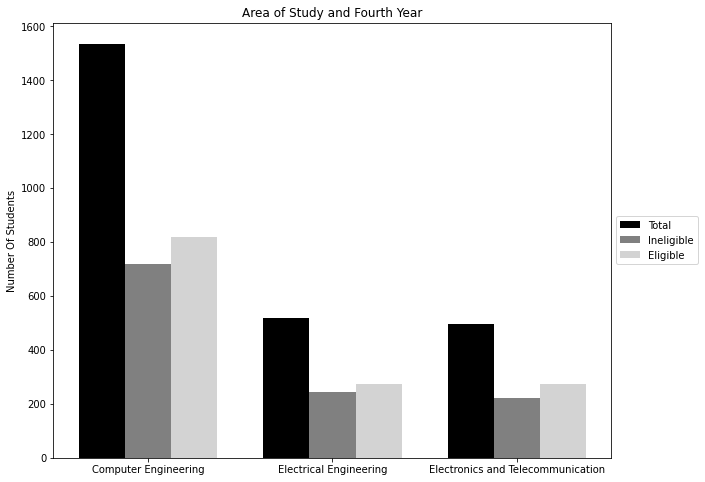

In [115]:
fig, ax = plt.subplots()
Fourth = ym[ym["Which-year are you studying in?"] == 'Second-year']
print(Fourth)

total_comp = Fourth[Fourth["Major/Area of Study"]=="Computer Engineering"]["City"].sum()
total_elec = Fourth[Fourth["Major/Area of Study"]=="Electrical Engineering"]["City"].sum()
total_extc = Fourth[Fourth["Major/Area of Study"]=="Electronics and Telecommunication"]["City"].sum()

y1 = Fourth[Fourth["Label"] == 0]["City"]
y2 = Fourth[Fourth["Label"] == 1]["City"]
y3 = [total_comp,total_elec,total_extc]
labels=Fourth["Major/Area of Study"].unique()
x = np.arange(len(labels))
width = 0.25

s3 = ax.bar(x , y3, width, label='Total',align='center',color='k')
s1 = ax.bar(x + 0.25 , y1, width, label='Ineligible',align='center',color='grey')
s2 = ax.bar(x + 0.5, y2, width, label='Eligible',align='center',color='lightgray')

ax.set_ylabel('Number Of Students')
ax.set_title('Area of Study and Fourth Year')
ax.set_xticks(x+0.25)
ax.set_xticklabels(labels)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()